In [1]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#regression librarry
from sklearn.ensemble import RandomForestRegressor
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os, sys
import csv

In [2]:
# load dataset
dataset_original = pd.read_csv ("bike_sharing.csv")
dataset = dataset_original
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# IN simple LR we want only 1 feature and 1 lable

dataset = dataset.loc[:,['temp','cnt']]


In [4]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 17379 rows and 2 Columns


In [5]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.34,0.5,0.66,1.0
cnt,17379.0,189.463088,181.387599,1.00,40.00,142.0,281.00,977.0


In [7]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

temp    0
cnt     0
dtype: int64

In [8]:
# check for minimum dataset
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [9]:
# # Handle Missing data
# def handle_min_values(dataset):
#     # replace min values by mean
#     dataset.replace(0, dataset.mean(), inplace=True)
#     return dataset

# dataset = handle_min_values(dataset)

In [10]:
#check dataset replace with mean or not
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [11]:
# # seperate fetures and label
# x_data = dataset.iloc[:, :-1].values
# y_data = dataset.iloc[:, 1].values

In [12]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
#     # one hot encoding
#     onehotencode = OneHotEncoder(categorical_features= [1])
#     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [13]:
# #convert numpy.ndarray to DataFrame
# x_data = pd.DataFrame(x_data)
# x_data.shape

In [14]:
# create directory to store csv files
os.mkdir("CSV_files")

In [15]:
# split dataset 

def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.30, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)

    # saving datasets into csv files
    test.to_csv('CSV_files/test_file.csv',index=False,encoding='utf-8')

    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.20,random_state=0)
    
     #load data into csv for train and cross validation
    train_data.to_csv('CSV_files/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV_files/CValidation_file.csv',index=False,encoding='utf-8')
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)

splitdata(dataset)

train :  (12165, 2)  test :  (5214, 2)
train_data :  (9732, 2)  crossV_data :  (2433, 2)


In [16]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 9732 rows and 2 Columns


In [17]:
train_dataset.head()

,temp,cnt
0,0.20,110
1,0.24,23
2,0.70,68
3,0.42,322
4,0.72,6


y_predict value for 6.5 is  [405.71263736]

 Accuracy train by acc_r2 82.44006762624387

 Accuracy train by mean_ab 98.72536479719132

 Accuracy train by mean_sq 26940.919735824235

 Accuracy train by mean_sq_log 2.0240421882902946

 Accuracy train by median_ab_error 98.60252814590058


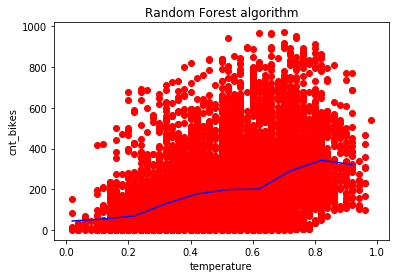


Pikle file created


In [18]:
class RandomForest2nd():
    
    def create_module(self,x_train,y_train):
        
         # fitting simple LR to the training set
        
        regression = RandomForestRegressor(n_estimators= 10 ,random_state=0)
    
        # regression.fit(x_train_data, y_train_data)
        
        regression.fit(x_train,y_train)
        
        return regression
    
   
        
    def y_prediction(self,regression, x_train):
       
        # predicting the test set result
        
        print("y_predict value for 6.5 is ", regression.predict(np.array(6.5).reshape(-1,1)))
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        
        # accuracy using r2 score
        
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
  
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab=( 1- (total_error / len(y_train))) *100
        
        mean_sq  = mean_squared_error(y_train, y_predict_train) 

        mean_sq_log = mean_squared_log_error(y_train, y_predict_train)  
    
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        
        return acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error
    

    
    def visualization(self,x_train,y_train,regression):
       
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        
        x_grid = np.arange(min(x_train), max(x_train), 0.1)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train, color = 'red')

        # reshape x_grid or not both will give same ploting
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'blue')
        plt.title("Random Forest algorithm")
        plt.xlabel("temperature")
        plt.ylabel("cnt_bikes")
        plt.show()
        
        
    def create_piklefile(self,regression):
        
        # dump train model pickle file
        
        file = open('RandomForestModule.pkl', 'wb')
        pickle.dump(regression,file)
        file.close()
        

def main():
    #class obj created
    obj  = RandomForest2nd()
    
    # seperate fetures and label
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values   

    
    regression = obj.create_module(x_train,y_train)
    
    y_train_pre = obj.y_prediction(regression, x_train)
   
    
    acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error = obj.accuracy(y_train_pre,y_train)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
    print("\n Accuracy train by mean_sq", mean_sq)
    print("\n Accuracy train by mean_sq_log", mean_sq_log)
    print("\n Accuracy train by median_ab_error", median_ab_error)
    
    y_train = y_train.reshape(-1, 1)
    
    obj.visualization(x_train,y_train, regression)
    
    obj.create_piklefile(regression)
    print("\nPikle file created")

if __name__ == '__main__':
    main()


In [19]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 2433 rows and 2 Columns



 Accuracy train by acc_r2 84.03953977081281

 Accuracy train by median_ab_error 98.92909413551223


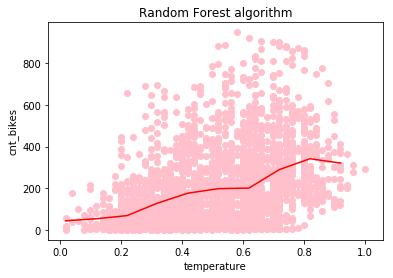

In [24]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_train,y_train, regression):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_train), max(x_train), 0.1)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train, color = 'pink')
#         plt.plot(x_grid,regression.predict(x_grid), color = 'blue')
        # reshape x_grid or not both will give same ploting
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'red')
        plt.title("Random Forest algorithm")
        plt.xlabel("temperature")
        plt.ylabel("cnt_bikes")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values
 
   
    #cross validation
    file1 = open('RandomForestModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
    
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv, y_cv, reg1)

if __name__ == '__main__':
    main()
